In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
NAICS = pd.read_excel('Fairlead Approved Vendor NAICS Codes.xlsx')

In [309]:
Fairlead_OnTime = pd.read_csv('FairleadOnTimeDeliveryFBW-FINT _Range 3-1-21 _3-1-22.csv')

In [310]:
Fairlead_OnTime.isnull().sum()

COMPANY_ID        0
PO_ID             0
PO_LN_NO          0
ITEM_ID           0
RECPT_LN_DESC     0
DUE_DT            0
RECPT_DT          0
RECPT_ID          0
RECV_UM_CD        1
RECV_QTY          0
ACCPT_QTY         0
REJ_QTY           0
RECV_AMT          0
ACCPT_AMT         0
REJ_AMT           0
PROJ_ID           4
VEND_ID           0
VEND_LONG_NAME    0
PO_LINE#          0
ON_TIME_TEST      0
WEEK_RECPT_DT     0
YEAR_RECPT_DT     0
DAYS_LATE         0
dtype: int64

In [311]:
Fairlead_OnTime.dropna(inplace = True)
Fairlead_OnTime.reset_index(drop=True,inplace=True)

In [312]:
NAICS.isnull().sum()

VEND_APPRVL_CD     0
COMPANY_ID         0
VEND_ID            0
VEND_NAME          0
OPP_NAICS_CD      55
OPP_NAICS_DESC     0
PRIME_NAIC         0
DUNS_NO           12
CAGE_CD           72
dtype: int64

In [313]:
NAICS.dropna(inplace =True)
NAICS.reset_index(drop=True,inplace=True)

In [314]:
Fairlead_OnTime.head(2)

,COMPANY_ID,PO_ID,PO_LN_NO,ITEM_ID,RECPT_LN_DESC,DUE_DT,RECPT_DT,RECPT_ID,RECV_UM_CD,RECV_QTY,...,ACCPT_AMT,REJ_AMT,PROJ_ID,VEND_ID,VEND_LONG_NAME,PO_LINE#,ON_TIME_TEST,WEEK_RECPT_DT,YEAR_RECPT_DT,DAYS_LATE
0,7,FBW2014701,1,3M 6885,"LENS COVER, FOR 6800 RESPIRATOR, 25/BAG",4/2/2021,3/29/2021,POR0013976,BAG,2.0,...,89.0,0.0,07OHD.GENR.03.01,10150,ADVANCE SAFETY EQUIPMENT CO.,FBW2014701_1,On Time,14,2021,0
1,7,FBW2017059,1,70156521,"ACCESSORY, BOOT, SILICONE RUBBER POLYMER, BRAS...",12/1/2021,11/15/2021,POR-003612,EA,40.0,...,100.0,0.0,D1905.0001.08,11525,AWC - ALLIED WIRE & CABLE,FBW2017059_1,On Time,47,2021,0


In [315]:
NAICS.head(2)

,VEND_APPRVL_CD,COMPANY_ID,VEND_ID,VEND_NAME,OPP_NAICS_CD,OPP_NAICS_DESC,PRIME_NAIC,DUNS_NO,CAGE_CD
0,A,2,100-02,"SPIVEY DISPOSAL, LLC",562998.0,All Other Miscellaneous Waste Management Services,N,145902990,54KV4
1,A,2,101-02,K.R. CAMPBELL INC. DBA HO,334515.0,Instrument Manufacturing for Measuring and Tes...,N,032212990,07KK8


In [316]:
merged = NAICS[['VEND_ID','OPP_NAICS_CD']].merge(Fairlead_OnTime[['RECV_QTY','RECV_AMT','VEND_ID','ON_TIME_TEST']], on= 'VEND_ID', how='inner')

In [317]:
merged.head()

,VEND_ID,OPP_NAICS_CD,RECV_QTY,RECV_AMT,ON_TIME_TEST
0,120005,334419.0,21.0,33684.0,On Time
1,120005,334419.0,21.0,7287.0,On Time
2,120005,334419.0,18.0,28872.0,On Time
3,120005,334419.0,18.0,6246.0,On Time
4,120005,335999.0,21.0,33684.0,On Time


In [318]:
merged.shape

(72896, 5)

In [319]:
# type(merged['OPP_NAICS_CD'][0])

In [320]:
# str(merged['OPP_NAICS_CD'][0])[:2]

In [321]:
def Main_code_2(x):
    return str(x)[:2]

In [322]:
# Main_code_2(merged['OPP_NAICS_CD'][0])

In [323]:
merged['Main_code_2']= merged['OPP_NAICS_CD'].apply(Main_code_2) 

In [324]:
merged.head()

,VEND_ID,OPP_NAICS_CD,RECV_QTY,RECV_AMT,ON_TIME_TEST,Main_code_2
0,120005,334419.0,21.0,33684.0,On Time,33
1,120005,334419.0,21.0,7287.0,On Time,33
2,120005,334419.0,18.0,28872.0,On Time,33
3,120005,334419.0,18.0,6246.0,On Time,33
4,120005,335999.0,21.0,33684.0,On Time,33


In [325]:
merged = merged.drop(['VEND_ID','OPP_NAICS_CD'],axis=1)

In [326]:
# merged.isnull().sum()

In [327]:
merged.head()

,RECV_QTY,RECV_AMT,ON_TIME_TEST,Main_code_2
0,21.0,33684.0,On Time,33
1,21.0,7287.0,On Time,33
2,18.0,28872.0,On Time,33
3,18.0,6246.0,On Time,33
4,21.0,33684.0,On Time,33


In [328]:
merged['ON_TIME_TEST'].value_counts()

On Time    57528
Late       15368
Name: ON_TIME_TEST, dtype: int64

<AxesSubplot: xlabel='ON_TIME_TEST', ylabel='count'>

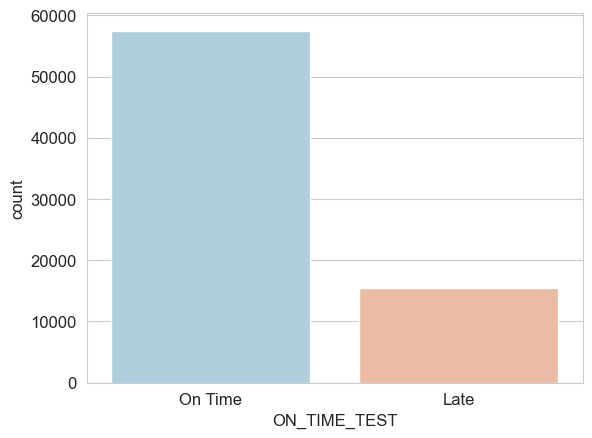

In [329]:
sns.set_style('whitegrid')
sns.countplot(x='ON_TIME_TEST',data=merged,palette='RdBu_r')

https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial#19.-k-Fold-Cross-Validation-

## Converting Categorical Features 

In [330]:
Main_code_2 = pd.get_dummies(merged['Main_code_2'],drop_first=True)

In [331]:
ON_TIME_TEST = pd.get_dummies(merged['ON_TIME_TEST'],drop_first=True)

In [332]:
merged.drop(['Main_code_2','ON_TIME_TEST'],axis=1,inplace=True)

In [333]:
merged = pd.concat([merged,Main_code_2,ON_TIME_TEST],axis=1)

###  0: Late , 1: On_Time

In [334]:
merged.head()

,RECV_QTY,RECV_AMT,22,23,31,32,33,42,44,45,...,49,51,52,53,54,55,56,81,92,On Time
0,21.0,33684.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,21.0,7287.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18.0,28872.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,18.0,6246.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,21.0,33684.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Our data is ready for our model!

# Building a Logistic Regression model

splitting our data into a training set and test set.

## Train Test Split

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_train, X_test, y_train, y_test = train_test_split(merged.drop('On Time',axis=1), 
                                                    merged['On Time'], test_size=0.30, 
                                                    random_state=101)

##  Feature Scaling

In [337]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Training and Predicting

In [338]:
from sklearn.linear_model import LogisticRegression

In [339]:
logmodel = LogisticRegression(solver='liblinear', random_state=0)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [340]:
predictions = logmodel.predict(X_test)

## Evaluation

In [341]:
from sklearn.metrics import classification_report

In [342]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.01      0.01      4595
           1       0.79      1.00      0.88     17274

    accuracy                           0.79     21869
   macro avg       0.71      0.50      0.45     21869
weighted avg       0.76      0.79      0.70     21869



In [343]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[   26  4569]
 [   15 17259]]


<AxesSubplot: >

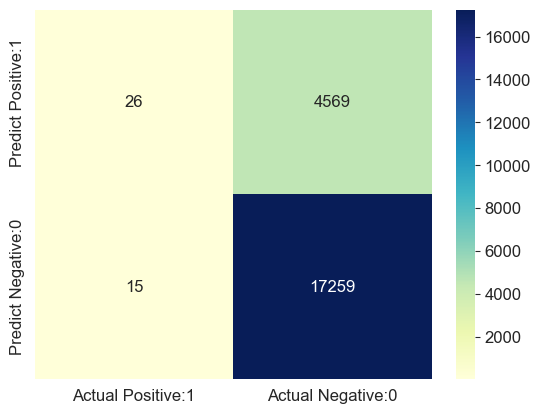

In [344]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [345]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [346]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7904


In [347]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2096


In [348]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0057


###  Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

In [350]:
# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6341


### Recall identifies the proportion of correctly predicted actual positives.

In [176]:
# print the first 10 predicted probabilities of two classes- 0 and 1: 0: Late , 1: On_Time

y_pred_prob = logmodel.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.17442623, 0.82557377],
       [0.17452002, 0.82547998],
       [0.17441437, 0.82558563],
       [0.17450048, 0.82549952],
       [0.21698388, 0.78301612],
       [0.26346906, 0.73653094],
       [0.26364717, 0.73635283],
       [0.26360806, 0.73639194],
       [0.18536132, 0.81463868],
       [0.15521357, 0.84478643]])

In [177]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Late(0)', 'Prob of On_Time (1)'])

y_pred_prob_df

,Prob of Late(0),Prob of On_Time (1)
0,0.174426,0.825574
1,0.174520,0.825480
2,0.174414,0.825586
3,0.174500,0.825500
4,0.216984,0.783016
5,0.263469,0.736531
6,0.263647,0.736353
7,0.263608,0.736392
8,0.185361,0.814639
9,0.155214,0.844786


## Classification threshold level = 0.5

In [178]:
# store the predicted probabilities for class 1 - Probability of On_Time

y_pred1 = logmodel.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

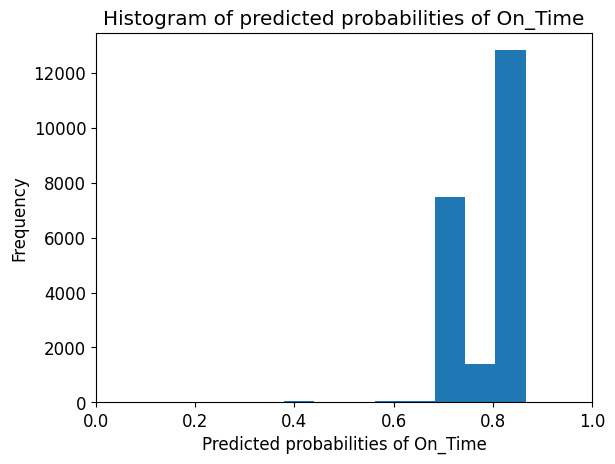

In [179]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of On_Time')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of On_Time')
plt.ylabel('Frequency')

#  ROC - AUC 

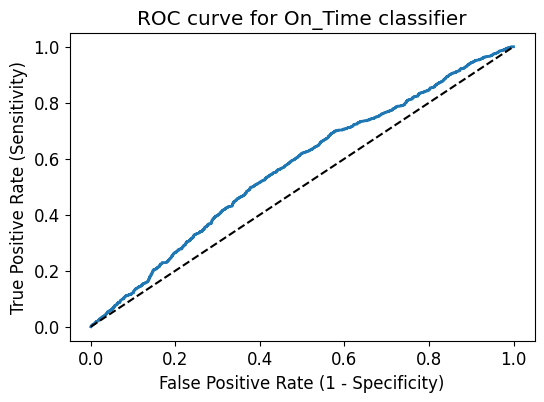

In [184]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'On Time')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for On_Time classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [185]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5686


### ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

### ROC AUC of our model Not high. So, we can conclude that our classifier does a good job in predicting whether it will be Late or On_Time.

# k-Fold Cross Validation

In [213]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logmodel, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79022144 0.78875171 0.78980892 0.78951494 0.78912298]


In [214]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7895


### Our, original model score is found to be 0.79. The average cross-validation score is 0.79. So, we can conclude that cross-validation does not result in performance improvement.